In [8]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q1 = "select * from sqlite_master where type='table'" 
pd.read_sql_query(q1,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [9]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [17]:
q3 = "select MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) from facts"
pd.read_sql_query(q3,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [18]:
q4 = "select name from facts where population == 0"
pd.read_sql_query(q4,conn)

,name
0,Antarctica


In [23]:
q5 = "select name from facts where population == 7256490011"
pd.read_sql_query(q5,conn)

,name
0,World


Antarctica and World are among the countries.They distort the summary statistics about the population of countries.

In [43]:
q6 = "SELECT population,population_growth,birth_rate,death_rate FROM facts WHERE population > (select MIN(population) FROM facts) AND population < (SELECT MAX(population) FROM facts);"
results = pd.read_sql_query(q6,conn)
results.dropna()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1b1a4f470>,
      dtype=object)

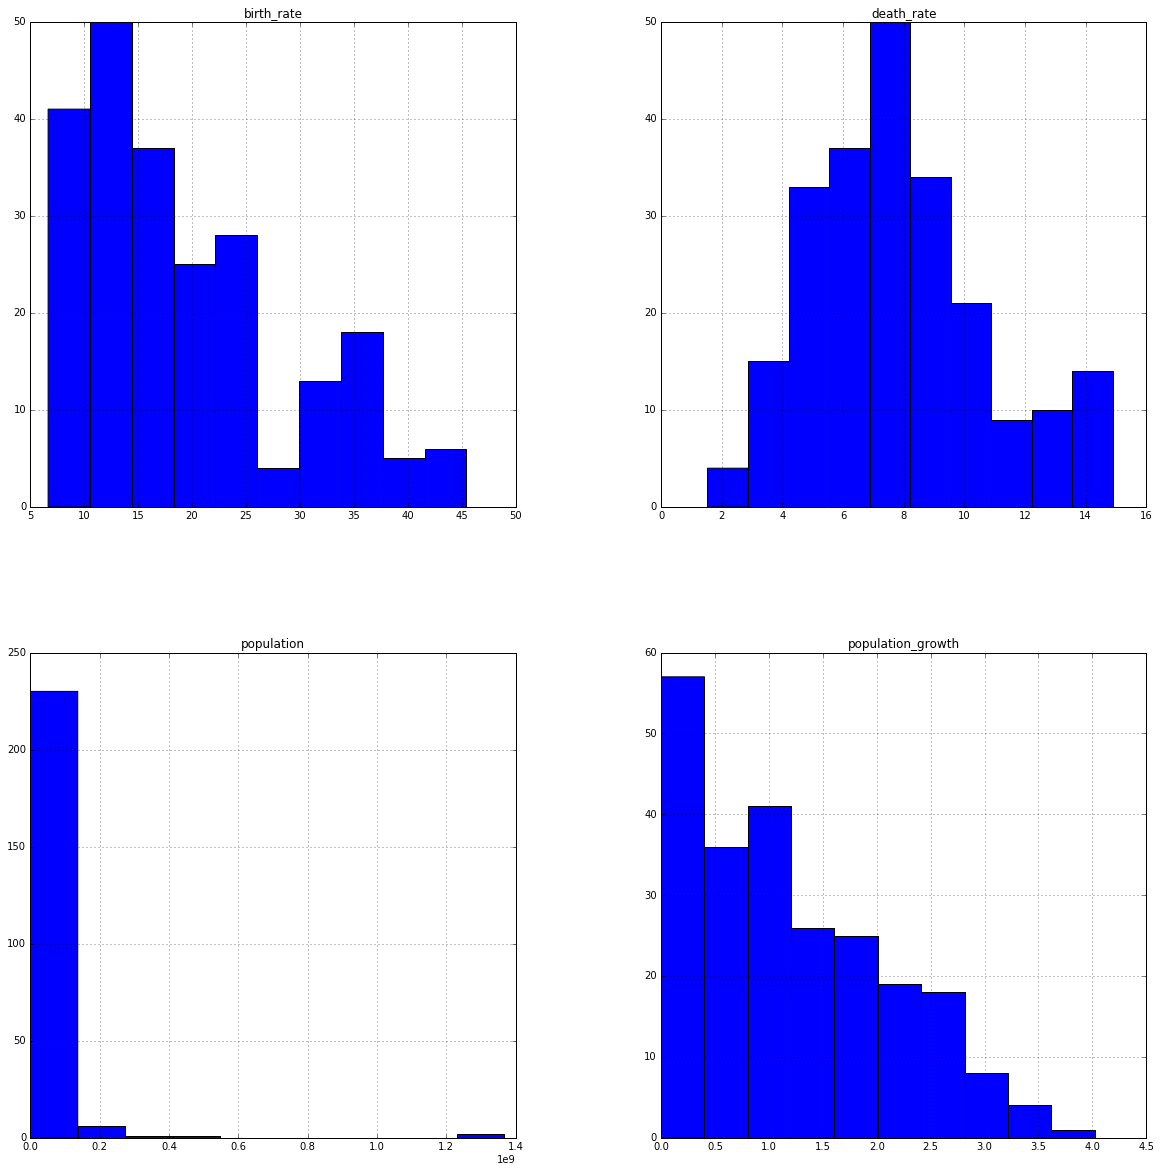

In [46]:
%matplotlib inline
results.hist(figsize=(20,20))

In [60]:
q7 = "SELECT name,area_water FROM facts WHERE area_water >100 ORDER BY area_water DESC"
water_area = pd.read_sql_query(q7,conn)
print(water_area)
water_area[water_area["name"]=="Turkey"]

                                  name  area_water
0                               Canada      891163
1                               Russia      720500
2                        United States      664709
3                                India      314070
4                                China      270550
5                               Brazil      157630
6                                 Iran      116600
7                             Ethiopia      104300
8                             Colombia      100210
9                            Indonesia       93000
10   Congo, Democratic Republic of the       77810
11                            Tanzania       61500
12                           Australia       58920
13      British Indian Ocean Territory       54340
14                              Uganda       43938
15                           Argentina       43710
16                              Sweden       39960
17                             Finland       34330
18                           Ve

,name,area_water
37,Turkey,13930


It looks like the countries with the biggest land area also have the largest water area. Turkey ranks 37th with 13930 km^2 water area.

In [61]:
q8 = "SELECT name,(population/area_land) density FROM facts ORDER BY density DESC"
density = pd.read_sql_query(q8,conn)
print(density)
density[density["name"] == "Turkey"]

                                              name  density
0                                            Macau  21168.0
1                                           Monaco  15267.0
2                                        Singapore   8259.0
3                                        Hong Kong   6655.0
4                                       Gaza Strip   5191.0
5                                        Gibraltar   4876.0
6                                          Bahrain   1771.0
7                                         Maldives   1319.0
8                                            Malta   1310.0
9                                          Bermuda   1299.0
10                                      Bangladesh   1297.0
11                                    Sint Maarten   1167.0
12                                        Guernsey    847.0
13                                          Jersey    838.0
14                                          Taiwan    725.0
15                                      

,name,density
101,Turkey,103.0


Macau,Monaco and Singapore are the most dense countries in the world. Turkey ranks 101th as a moderately dense country in the world.